In [1]:
from google.colab import drive
drive.mount('/content/drive/')
# DUE DATE = [INSERT DATE HERE]
# HOPE YOU ENJOYED THE RIDE
# GOOD LUCK!
#    |\---/|
#    | ,_, |
#     \_`_/-..----.
#  ___/ `   ' ,""+ \  
# (__...'   __\    |`.___.';
#   (_,...'(_,.`__)/'.....+

Mounted at /content/drive/


# Regression

Regression is a statistical analysis technique used to model the relationship between a dependent variable (also known as the response or target variable) and one or more independent variables (also known as predictors or features). The goal of regression analysis is to understand and predict the value of the dependent variable based on the values of the independent variables.


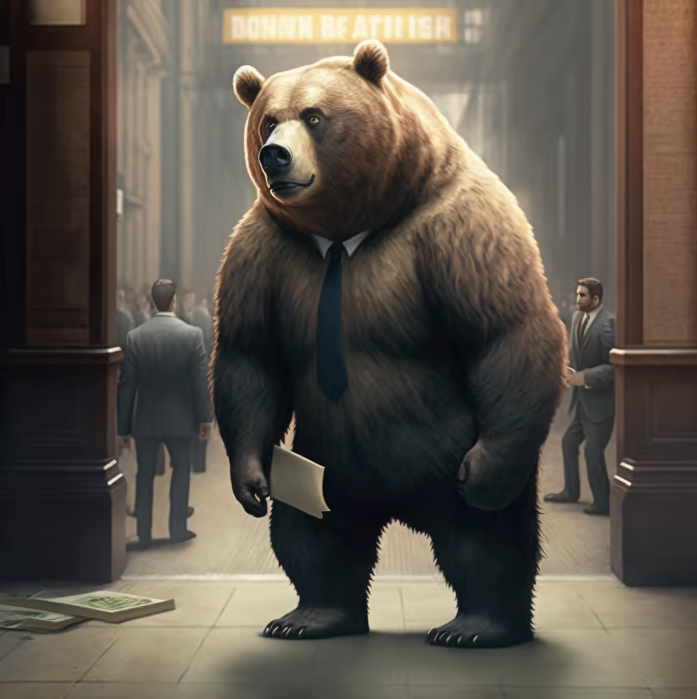
<br>
"Bear Stearns" by Midjourney

In this section, you are going to build a loan interest rate prediction model using regression.

## Data Preprocessing (9 pts)

There were apparently some researchers who were kidnapped during the survey by the Harkonnens which led to incomplete data.
** **
In this section, you are going to load the dataset and drop irrelevant column(s). 

Next, check for missing values and total number of duplicates. You will fill the missing values with the mode of the corresponding feature and print such features.



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#loading the data
 ### WRITE YOUR CODE ###
df = pd.read_csv('/content/drive/MyDrive/cs210/CS210_Hw3/loans.csv')
#dropping the irrelevant column
### WRITE YOUR CODE ###
df.head()
# Drop the 'ID' and 'Unnamed: 0' columns
df = df.drop(['ID', 'Unnamed: 0'], axis=1)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values for each feature:")
print(missing_values)

# Fill missing values with the mode
missing_columns = df.columns[df.isnull().any()].tolist()

for column in missing_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)
    print(f"Filled missing values in {column} with mode: {df[column].mode()[0]}")

# Check for duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Drop duplicates
if num_duplicates > 0:
    df = df.drop_duplicates()
    print(f"Dropped {num_duplicates} duplicates")


Missing values for each feature:
Amount_Requested                   0
Amount_Funded_By_Investors         0
Interest_Rate                      0
Loan_Length                        1
Loan_Purpose                       1
Debt_To_Income_Ratio               0
Home_Ownership                     0
Monthly_Income                     0
Open_CREDIT_Lines                  0
Revolving_CREDIT_Balance           0
Inquiries_in_the_Last_6_Months     0
Employment_Length                 78
dtype: int64
Filled missing values in Loan_Length with mode: 36.0
Filled missing values in Loan_Purpose with mode: debt_consolidation
Filled missing values in Employment_Length with mode: 10.0
Number of duplicate rows: 0


## Exploratory Data Analysis (18 pts)

Visualize the the interest rates corresponding to different Home_Ownership and Loan_Length parameters.
*   Create a new figure with a size of (10,5).
*   On a bar plot, represent the 'Home_Ownership' column in x-axis and the 'Interest_Rate' column in y-axis.
*   Hue would be according to the Loan_Length.
* Show the plot.



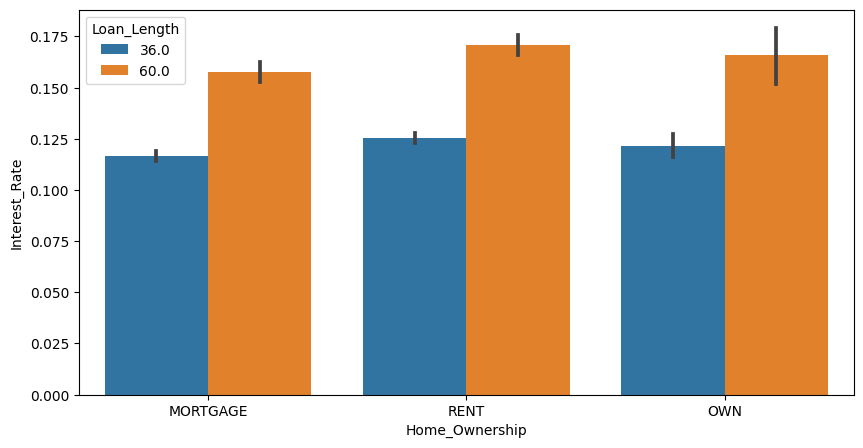

In [3]:
### WRITE YOUR CODE ###
plt.figure(figsize=(10, 5))

# Create a bar plot
sns.barplot(data=df, x='Home_Ownership', y='Interest_Rate', hue='Loan_Length')

# Show the plot
plt.show()

Create a pie plot to demonstrate the share of distribution in home ownership.

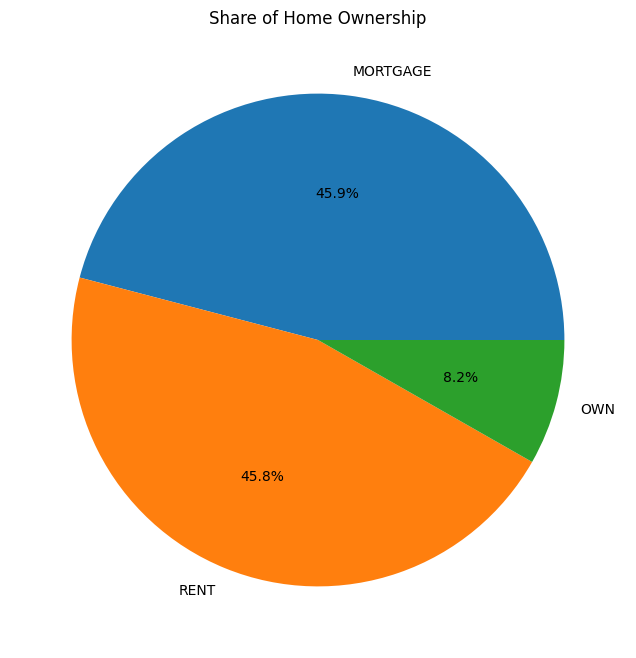

In [4]:
### WRITE YOUR CODE ###
home_ownership_count = df['Home_Ownership'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(home_ownership_count, labels = home_ownership_count.index, autopct='%1.1f%%')
plt.title("Share of Home Ownership")
plt.show()

Check the data types for each feature and convert the categorical features into numerical values.

**Hint:** You can use the "get_dummies" function of Pandas library.

In [5]:
df.dtypes

Amount_Requested                    int64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
Home_Ownership                     object
Monthly_Income                    float64
Open_CREDIT_Lines                   int64
Revolving_CREDIT_Balance            int64
Inquiries_in_the_Last_6_Months      int64
Employment_Length                 float64
dtype: object

In [6]:
df.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'Home_Ownership',
       'Monthly_Income', 'Open_CREDIT_Lines', 'Revolving_CREDIT_Balance',
       'Inquiries_in_the_Last_6_Months', 'Employment_Length'],
      dtype='object')

In [7]:
### WRITE YOUR CODE ###
df = pd.get_dummies(df)



df.dtypes

Amount_Requested                     int64
Amount_Funded_By_Investors         float64
Interest_Rate                      float64
Loan_Length                        float64
Debt_To_Income_Ratio               float64
Monthly_Income                     float64
Open_CREDIT_Lines                    int64
Revolving_CREDIT_Balance             int64
Inquiries_in_the_Last_6_Months       int64
Employment_Length                  float64
Loan_Purpose_Personal                uint8
Loan_Purpose_credit_card             uint8
Loan_Purpose_debt_consolidation      uint8
Loan_Purpose_house                   uint8
Loan_Purpose_major_purchase          uint8
Loan_Purpose_other                   uint8
Loan_Purpose_small_business          uint8
Home_Ownership_MORTGAGE              uint8
Home_Ownership_OWN                   uint8
Home_Ownership_RENT                  uint8
dtype: object

Create a heatmap to present the relationships between different features.

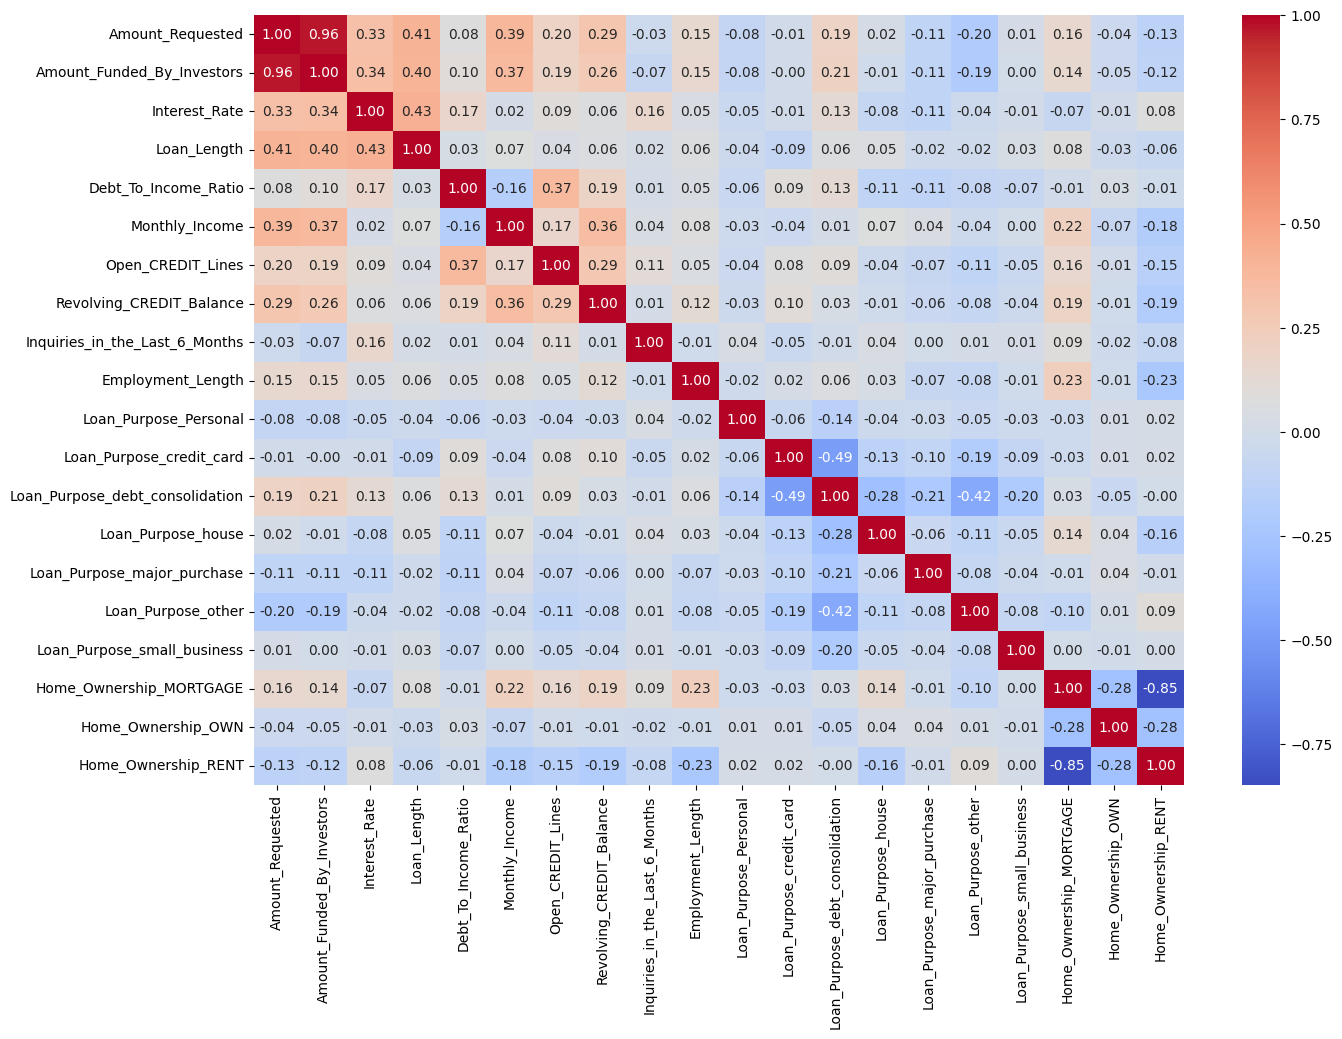

In [8]:
### WRITE YOUR CODE ###
# Calculate the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Show the plot
plt.show()

## Model Evaluation (15 pts)

Separate the data into features and labels.



In [9]:
#seperate the data into features and labels
### WRITE YOUR CODE ###


X = df.drop('Interest_Rate', axis=1)  # Features
y = df['Interest_Rate']  # Labels


Split the data into training and test data. You could use a ratio of 80/20.

In [10]:
### WRITE YOUR CODE ###

from sklearn.model_selection import train_test_split

# Split data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train a linear regression model on and report the MSE and R2 score on the training data.

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training data
y_train_pred = model.predict(X_train)

# Calculate MSE and R2 score
mse = mean_squared_error(y_train, y_train_pred)
r2 = r2_score(y_train, y_train_pred)

# Print MSE and R2 score
print(f'Training Mean Squared Error: {mse}')
print(f'Training R2 Score: {r2}')


Training Mean Squared Error: 0.0011820393300735422
Training R2 Score: 0.3008687702490983


Run the model on test data and report the MSE and R2 score.

In [12]:
# Make predictions on the test data
y_test_pred = model.predict(X_test)

# Calculate MSE and R2 score
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print MSE and R2 score
print(f'Test Mean Squared Error: {mse_test}')
print(f'Test R2 Score: {r2_test}')

Test Mean Squared Error: 0.0012657470603893303
Test R2 Score: 0.2793678916505373


# Experiment with Different Regression Models (8 pts)

Experiment with at least one alternative regression model.

Report the results in comparison with those of the linear regressor.

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Store linear regressor metrics
linear_mse = mse_test
linear_r2 = r2_test

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a pipeline for Polynomial Regression
polyreg = make_pipeline(PolynomialFeatures(2), LinearRegression())
polyreg.fit(X_train_scaled, y_train)

# Predict on test data and calculate metrics
y_test_pred_poly = polyreg.predict(X_test_scaled)
poly_mse = mean_squared_error(y_test, y_test_pred_poly)
poly_r2 = r2_score(y_test, y_test_pred_poly)

# Print the results
print(f'Linear Regression Test MSE: {linear_mse}, R2 Score: {linear_r2}')
print(f'Polynomial Regression Test MSE: {poly_mse}, R2 Score: {poly_r2}')


Linear Regression Test MSE: 0.0012657470603893303, R2 Score: 0.2793678916505373
Polynomial Regression Test MSE: 0.0015164711165295915, R2 Score: 0.13662230618205495


# Classification

Classification is a fundamental task in machine learning that is often used in conjunction with regression. The goal of a classification task is to train a machine learning algorithm to accurately assign a given set of features to the correct class. There are various types of classification tasks, such as image classification, text classification, and audio classification etc.

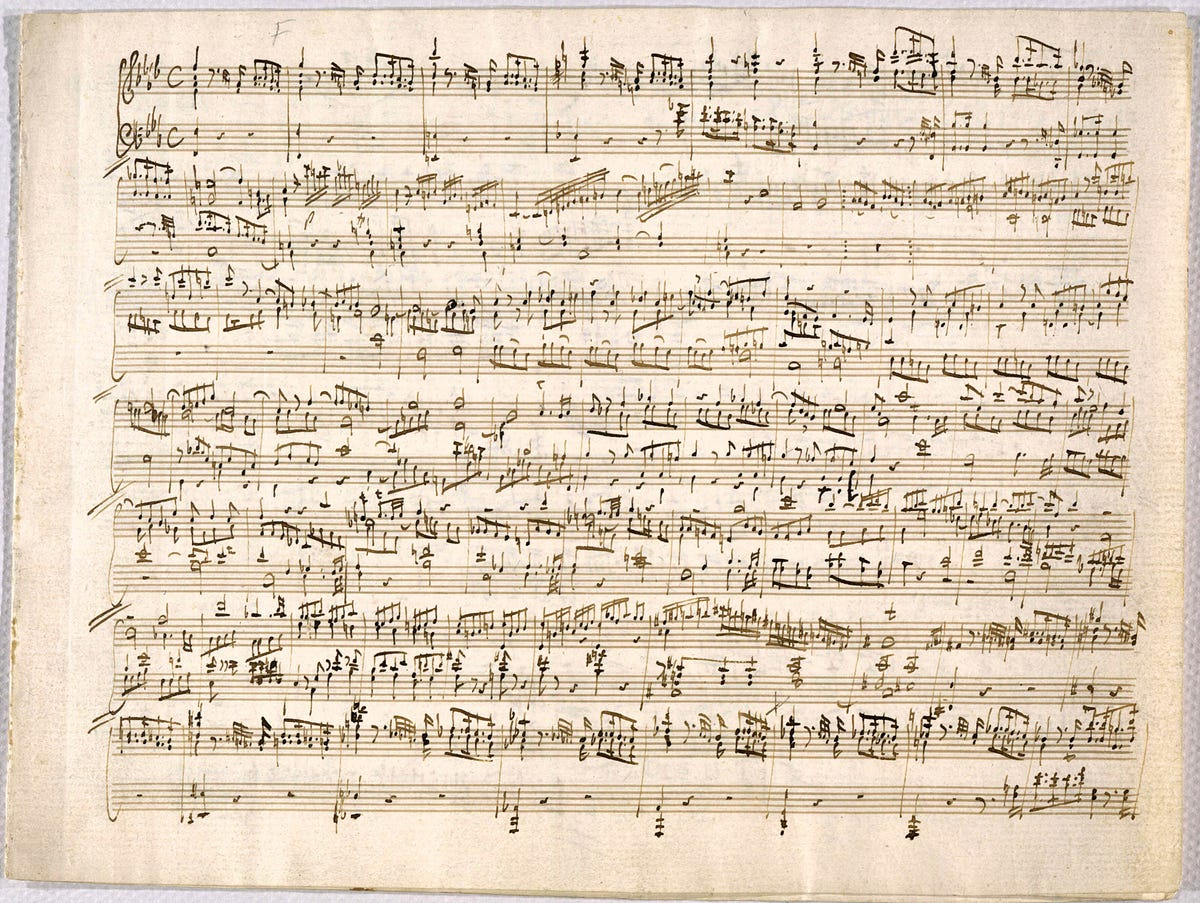

In this section, we are going to build and train a model which can figure out the composer from the notes and velocities that are in the song. These values are stored inside midi files. 

In [15]:
!pip install pretty_midi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 54.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 6.6 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592289 sha256=7d9df2dd061e9181cf4472aa98d27a25b3d777b5f253db5cf96687eb142d4569
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi


In [16]:
import pretty_midi
import numpy as np
import os
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

Do not delete this function. We will use this function to extract the values we have talked before.

In [17]:
def extractNotesAndVelocities(path):
    # Reading the midi file
    midi_data = pretty_midi.PrettyMIDI(path)
    
    notes = np.array([])
    velocities = np.array([])

    # Extracting pitch and velocity values of each song 
    for instrument in midi_data.instruments:
      notes = np.append(notes, np.array([note.pitch for note in instrument.notes]))
      velocities = np.append(velocities, np.array([note.velocity for note in instrument.notes]))

    return notes, velocities

## Data Loading (10 pts)

Read the MIDI files in all the folders in the given root directory and store them in a dictionary. There are some corrupted files inside the folders so don't forget to write a code to bypass that. You can use the extractNotesAndVelocities function above to extract the needed values. (10 pts)

In [24]:
def createComposersDictionary(root_path):
  composers = {}

  # Extract notes and velocities of each song and 
  # store them in a dictionary with composer names as keys
  # Write a code to bypass corrupted files and print the filenames of the corrupted files

  ### WRITE YOUR CODE ###
  for composer_dir in os.listdir(root_path):
    composer_path = os.path.join(root_path, composer_dir)
    
    # Ensure we're working with a directory
    if not os.path.isdir(composer_path):
        continue

    composers[composer_dir] = {'notes': [], 'velocities': []}

  for filename in os.listdir(composer_path):
      file_path = os.path.join(composer_path, filename)

      if not file_path.endswith('.mid'):
        continue

      try:
        # Extract notes and velocities from midi file
        notes, velocities = extractNotesAndVelocities(file_path)

        # Append to the respective composer
        composers[composer_dir]['notes'].extend(notes)
        composers[composer_dir]['velocities'].extend(velocities)

      except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        continue

  return composers

  ########################
  return composers

path = '/content/drive/MyDrive/cs210/CS210_Hw3/musicnet_midis'### path for the musicnet_midis folder
composers = createComposersDictionary(path)

## Mapping Name to Index (5 pts)

Since the machine learning solutions only understand numeric values we need to create a mapping from names of the composers to numbers.(5 pts)

In [25]:
composer_name_to_index = {composer: i for i, composer in enumerate(composers.keys())}


In [26]:
composer_name_to_index

{'Bach': 0, 'Beethoven': 1, 'Schubert': 2, 'Mozart': 3}

## Data Preprocessing (10 pts)

The machine learning algorithms work by using fixed sized inputs and outputs and songs have different numbers of notes, therefore we need to put them inside a fixed sized of vectors. Fixed size will be 400!!!

Scikit-learn only has shallow machine learning algorithms, thus you can use flatten() function to convert the numpy array of notes and velocities to 1d vector.



In [28]:
fixed_size = 400 # Fixed size of features

labels = [] # Store the labels in this list
features = [] # Store the features as 2d(number of elements, fixed size) arrays in this list
notes = [] # Store the average pitch of each fixed sized array in this list for visualization
velocities = [] # Store the average velocity if each fixed sized array in this list for visualization

for composer, notes_and_velocities in composers.items():
  composer_notes = notes_and_velocities['notes']
  composer_velocities = notes_and_velocities['velocities']
  for i in range(0, len(composer_notes), fixed_size):
    chunk_notes = composer_notes[i:i+fixed_size]
    chunk_velocities = composer_velocities[i:i+fixed_size]

    # Bypass the songs with less than 400 notes
    if len(chunk_notes) < fixed_size:
        continue

    # Extract then store the average notes and velocities of each 400 fixed sized vectors
    notes.append(np.mean(chunk_notes))
    velocities.append(np.mean(chunk_velocities))

    # Extract then store the composer names of each 400 sized vectors
    labels.append(composer_name_to_index[composer])

    # Extract then store the features(notes and velocities) of each 400 sized vectors 
    # do not forget to flatten the array before storing
    combined_features = np.concatenate((chunk_notes, chunk_velocities))
    features.append(combined_features.flatten())

    ########################

labels = np.array(labels)
features = np.array(features)
notes = np.array(notes)
velocities = np.array(velocities)

# Data Visualization (6 pts)

Visualize the average velocity and pitch of each song(400 fixed size vector) with the composers as colors.


1.   Create figure with 16, 12 figsize
2.   Plot scatter plot using notes and velocities with labels as color
3.   Write xlabel as Notes
4.   Write ylabel as Velocities
5.   Write title as Notes vs Velocities with Labels
6.   Put colorbar
7.   Show the plot

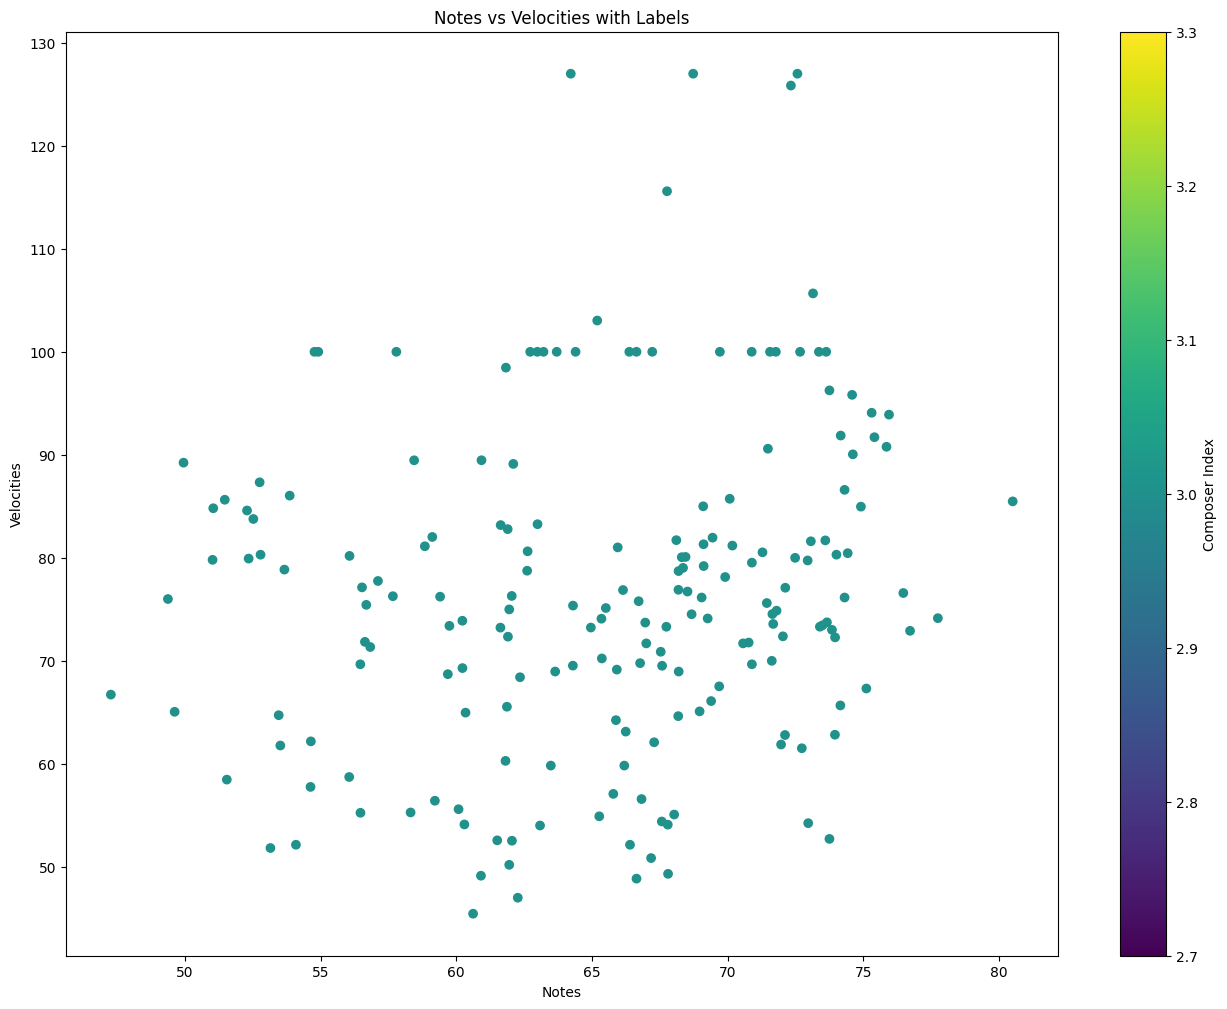

In [29]:
### WRITE YOUR CODE ###
# Creating a new figure
plt.figure(figsize=(16, 12))

# Creating a scatter plot of notes vs velocities, color-coded by labels (composer names)
scatter = plt.scatter(notes, velocities, c=labels, cmap='viridis')

# Creating labels for the axes and the title
plt.xlabel('Notes')
plt.ylabel('Velocities')
plt.title('Notes vs Velocities with Labels')

# Adding a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Composer Index')

# Displaying the plot
plt.show()


## Checking lengths (2 pts)

Check whether the lengths of features and labels are the same or not.(2pts)

In [30]:
### WRITE YOUR CODE ###
if len(features) == len(labels):
    print("The lengths of the features and labels are the same.")
else:
    print("The lengths of the features and labels are NOT the same.")


The lengths of the features and labels are the same.


## Train-test split (2 pts)

Split the features and labels into train and test datasets using sklearn with test size of 0.2(2 pts)

In [31]:
### WRITE YOUR CODE ###
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)


## Choosing and training a model (10 pts)

Choose a classification model and explain why it is the better choice.(8 pts)

Train the model(2pts)

In [35]:
### WRITE YOUR CODE ###
from sklearn.ensemble import RandomForestClassifier
# I choosed random forest because it can handle number of features
# also it combines the predictions of several models (in this case, decision trees) 
#to give a more accurate prediction than any individual model would. 
#This can help improve accuracy and reduce the chance of overfitting.

# Initialize the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(features_train, labels_train)


RandomForestClassifier(random_state=42)

## Model Evaluation (5 pts)

Predict on test features and use f1_score to evaluate your model.(5pts)

In [36]:
### WRITE YOUR CODE ###
from sklearn.metrics import f1_score

# Predict on the test features
labels_pred = clf.predict(features_test)

# Calculate the f1 score
f1 = f1_score(labels_test, labels_pred, average='weighted')

print("The f1 score is:", f1)
#I am suprised with the result I hope it did not overfit

The f1 score is: 1.0
